In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

In [9]:
def load_polyline(csv_path):
    """Load polyline data from a CSV file and return as a DataFrame."""
    return pd.read_csv(csv_path)

In [7]:
def calculate_geometric_features(polyline):
    """Calculate detailed geometric features for the given polyline."""
    diffs = np.diff(polyline, axis=0)
    distances = np.sqrt(np.sum(diffs**2, axis=1))
    angles = np.degrees(np.arctan2(diffs[:, 1], diffs[:, 0]))

    # Convex hull area and perimeter
    hull = ConvexHull(polyline)
    hull_area = hull.volume
    hull_perimeter = hull.area

    # Aspect Ratio of the bounding box
    x_min, x_max = np.min(polyline[:, 0]), np.max(polyline[:, 0])
    y_min, y_max = np.min(polyline[:, 1]), np.max(polyline[:, 1])
    aspect_ratio = (x_max - x_min) / (y_max - y_min) if (y_max - y_min) != 0 else 0

    return distances, angles, hull_area, hull_perimeter, aspect_ratio

In [10]:
polyline = load_polyline('../data/raw/sample_polyline.csv').values
features = calculate_geometric_features(polyline)
print("Distances:", features[0])
print("Angles:", features[1])
print("Convex Hull Area:", features[2])
print("Convex Hull Perimeter:", features[3])
print("Aspect Ratio:", features[4])

Distances: [2.23606798 1.41421356 1.         2.23606798]
Angles: [63.43494882 45.          0.         63.43494882]
Convex Hull Area: 3.0
Convex Hull Perimeter: 12.957417329238151
Aspect Ratio: 0.8


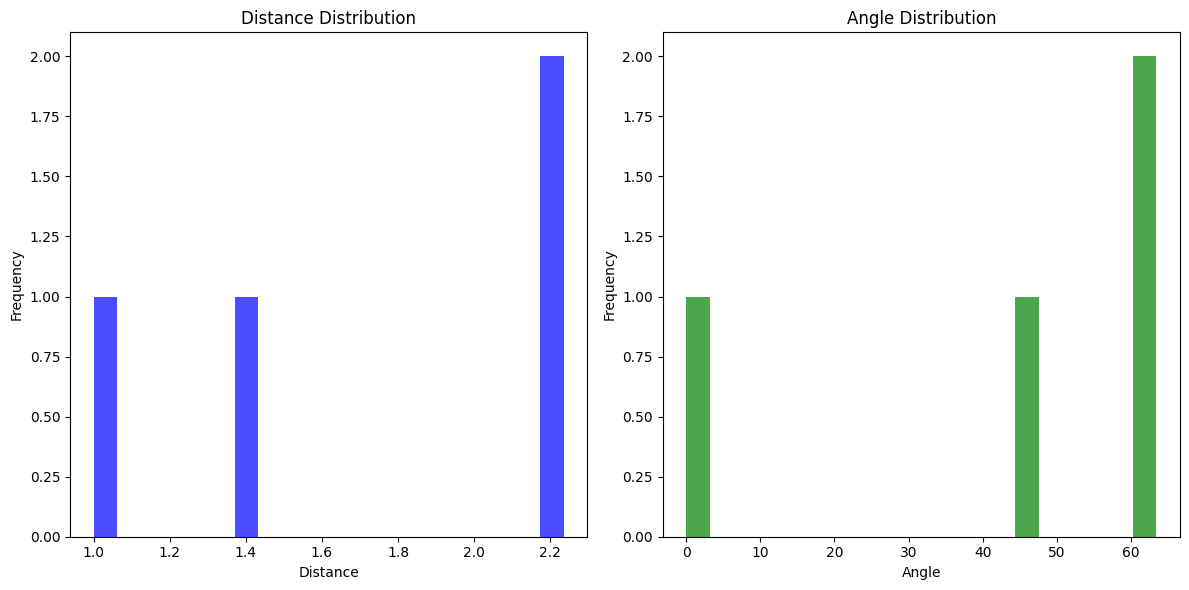

In [11]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(features[0], bins=20, color='blue', alpha=0.7)
plt.title('Distance Distribution')
plt.xlabel('Distance')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(features[1], bins=20, color='green', alpha=0.7)
plt.title('Angle Distribution')
plt.xlabel('Angle')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()